In [75]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import math
import os

•	Descarga el dataset correspondiente a tu equipo de la siguiente página: Datasets Por Equipo.
•	Realizar tareas de EDA y limpieza de datos, eliminando valores nulos, inconsistentes, vacios, outliers, inválidos, etc. Proporcionamos también una versión no modificada (limpia) del dataset original, para que comparen sus resultados. (Pueden documentar métricas utilizadas, etc.)


In [60]:
# Cargar datos desde DVC
# Asegúrate de haber ejecutado `dvc pull` antes de correr este notebook

DATA_PATH = "../data/turkish_music_emotion_modified.csv"
df = pd.read_csv(DATA_PATH)

print(f"Dimensiones iniciales: {df.shape}")
df.head()

Dimensiones iniciales: (408, 52)


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,mixed_type_col
0,relax,0.052,NaN,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.97,979
1,relax,0.125,0.439,6.680,142.24,4.058,0.516,0.785,0.397,0.556,...,1.000,0.0,0.984,0.285,0.211,-0.082,3.364,0.702,0.967,943
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.746,0.016,1.0,0.413,28.105999999999998,0.134,1.682,0.692,0.963,628
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,1.000,0.161,0.757,error,0.265,0.042,0.354,0.743,0.968,192
4,relax,0.066,0.591,9.769,88.89,3.217,0.228,0.814,0.096,0.434,...,0.404,1.0,0.001,0.345,0.261,0.089,0.748,0.674,0.957,292


In [61]:
# Estructura general y tipos de datos
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 401 non-null    object 
 2   _Lowenergy_Mean                                 404 non-null    float64
 3   _Fluctuation_Mean                               405 non-null    float64
 4   _Tempo_Mean                                     401 non-null    object 
 5   _MFCC_Mean_1                                    402 non-null    float64
 6   _MFCC_Mean_2                                    403 non-null    float64
 7   _MFCC_Mean_3                                    397 non-null    object 
 8   _MFCC_Mean_4                                    402 non-null    object 
 9   _MFCC_Mean_5                               

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Class,403,8,relax,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_RMSenergy_Mean,401,211,0.06,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_Lowenergy_Mean,404.0,NaN,NaN,NaN,4.241829,50.714118,0.302,0.523,0.5535,0.585,805.528
_Fluctuation_Mean,405.0,NaN,NaN,NaN,9.711723,32.204572,3.987,5.852,6.745,7.838,483.105
_Tempo_Mean,401,384,150.255,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_MFCC_Mean_1,402.0,NaN,NaN,NaN,6.270055,37.120651,0.423,1.95875,2.42,2.9,565.49
_MFCC_Mean_2,403.0,NaN,NaN,NaN,7.599908,77.807229,-43.608,-0.267,0.065,0.4135,946.483
_MFCC_Mean_3,397,320,0.259,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_MFCC_Mean_4,402,328,0.123,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_MFCC_Mean_5,400,301,0.124,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Eliminar duplicados
duplicados = df.duplicated().sum()
df = df.drop_duplicates()

print(f"Duplicados eliminados: {duplicados}")

Duplicados eliminados: 0


In [64]:
# Valores nulos y vacíos
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({"Nulos": missing, "%": missing_pct})
#missing_df.head(100)
print(missing_df)

                                                Nulos     %
Class                                               5  1.23
_AttackTime_Mean                                    3  0.74
_AttackTime_Slope                                   6  1.47
_Brightness_Mean                                    3  0.74
_Chromagram_Mean_1                                  5  1.23
_Chromagram_Mean_10                                 5  1.23
_Chromagram_Mean_11                                 4  0.98
_Chromagram_Mean_12                                 2  0.49
_Chromagram_Mean_2                                  4  0.98
_Chromagram_Mean_3                                  3  0.74
_Chromagram_Mean_4                                  5  1.23
_Chromagram_Mean_5                                  5  1.23
_Chromagram_Mean_6                                  5  1.23
_Chromagram_Mean_7                                  6  1.47
_Chromagram_Mean_8                                  1  0.25
_Chromagram_Mean_9                      

In [65]:
# Columnas que deben excluirse del proceso de conversión numérica
exclude_cols = ["Class"]

# Recorremos todas las columnas del DataFrame
for col in df.columns:
    # Saltar las columnas categóricas
    if col in exclude_cols:
        continue

    # Convertir todos los valores a string y quitar espacios
    df[col] = df[col].astype(str).str.strip()

    # Reemplazar valores textuales no válidos por NaN
    df[col] = df[col].replace(
        ["error", "nan", "NaN", "None", "", "?", "undefined"], np.nan
    )

    # 3Intentar convertir a numérico (los que no se puedan -> NaN)
    df[col] = pd.to_numeric(df[col], errors="coerce")

# (Opcional) Imputar NaN con la mediana (solo en columnas numéricas)
df = df.fillna(df.median(numeric_only=True))

print("✅ Limpieza aplicada (columna 'Class' excluida).")
print("Nulos restantes:", df.isna().sum().sum())

✅ Limpieza aplicada (columna 'Class' excluida).
Nulos restantes: 5


In [67]:
# Estructura general y tipos de datos
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           403 non-null    object 
 1   _RMSenergy_Mean                                 408 non-null    float64
 2   _Lowenergy_Mean                                 408 non-null    float64
 3   _Fluctuation_Mean                               408 non-null    float64
 4   _Tempo_Mean                                     408 non-null    float64
 5   _MFCC_Mean_1                                    408 non-null    float64
 6   _MFCC_Mean_2                                    408 non-null    float64
 7   _MFCC_Mean_3                                    408 non-null    float64
 8   _MFCC_Mean_4                                    408 non-null    float64
 9   _MFCC_Mean_5                               

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Class,403,8,relax,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_RMSenergy_Mean,408.0,NaN,NaN,NaN,3.249309,47.230938,0.01,0.086,0.1295,0.176,873.096
_Lowenergy_Mean,408.0,NaN,NaN,NaN,4.205669,50.465605,0.302,0.523,0.5535,0.58425,805.528
_Fluctuation_Mean,408.0,NaN,NaN,NaN,9.689909,32.086666,3.987,5.8595,6.745,7.8305,483.105
_Tempo_Mean,408.0,NaN,NaN,NaN,152.725463,597.736861,48.284,101.859,119.189,146.5055,12177.714
_MFCC_Mean_1,408.0,NaN,NaN,NaN,6.213436,36.84894,0.423,1.96325,2.42,2.89025,565.49
_MFCC_Mean_2,408.0,NaN,NaN,NaN,7.507569,77.332275,-43.608,-0.26275,0.065,0.40625,946.483
_MFCC_Mean_3,408.0,NaN,NaN,NaN,8.784135,73.928866,-0.87,0.30375,0.492,0.687,721.726
_MFCC_Mean_4,408.0,NaN,NaN,NaN,2.457086,49.263214,-11.56,-0.116,0.0475,0.19825,994.982
_MFCC_Mean_5,408.0,NaN,NaN,NaN,5.560284,54.254529,-0.494,0.063,0.191,0.296,683.085


In [ ]:
# Eliminar 5 valores nulos de Class
# Mostrar cuántos valores nulos hay antes
print("Valores nulos en 'Class' antes:", df['Class'].isna().sum())

# Eliminar filas donde la columna 'Class' tenga NaN
df = df.dropna(subset=['Class'])

# Verificar que se eliminaron
print("Valores nulos en 'Class' después:", df['Class'].isna().sum())
print("✅ Filas con 'Class' nula eliminadas.")

Valores nulos en 'Class' antes: 5
Valores nulos en 'Class' después: 0
✅ Filas con 'Class' nula eliminadas.


In [71]:
# Valores nulos y vacíos

missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({"Nulos": missing, "%": missing_pct})
missing_df.head(10)

,Nulos,%
Class,0,0.0
_AttackTime_Mean,0,0.0
_AttackTime_Slope,0,0.0
_Brightness_Mean,0,0.0
_Chromagram_Mean_1,0,0.0
_Chromagram_Mean_10,0,0.0
_Chromagram_Mean_11,0,0.0
_Chromagram_Mean_12,0,0.0
_Chromagram_Mean_2,0,0.0
_Chromagram_Mean_3,0,0.0


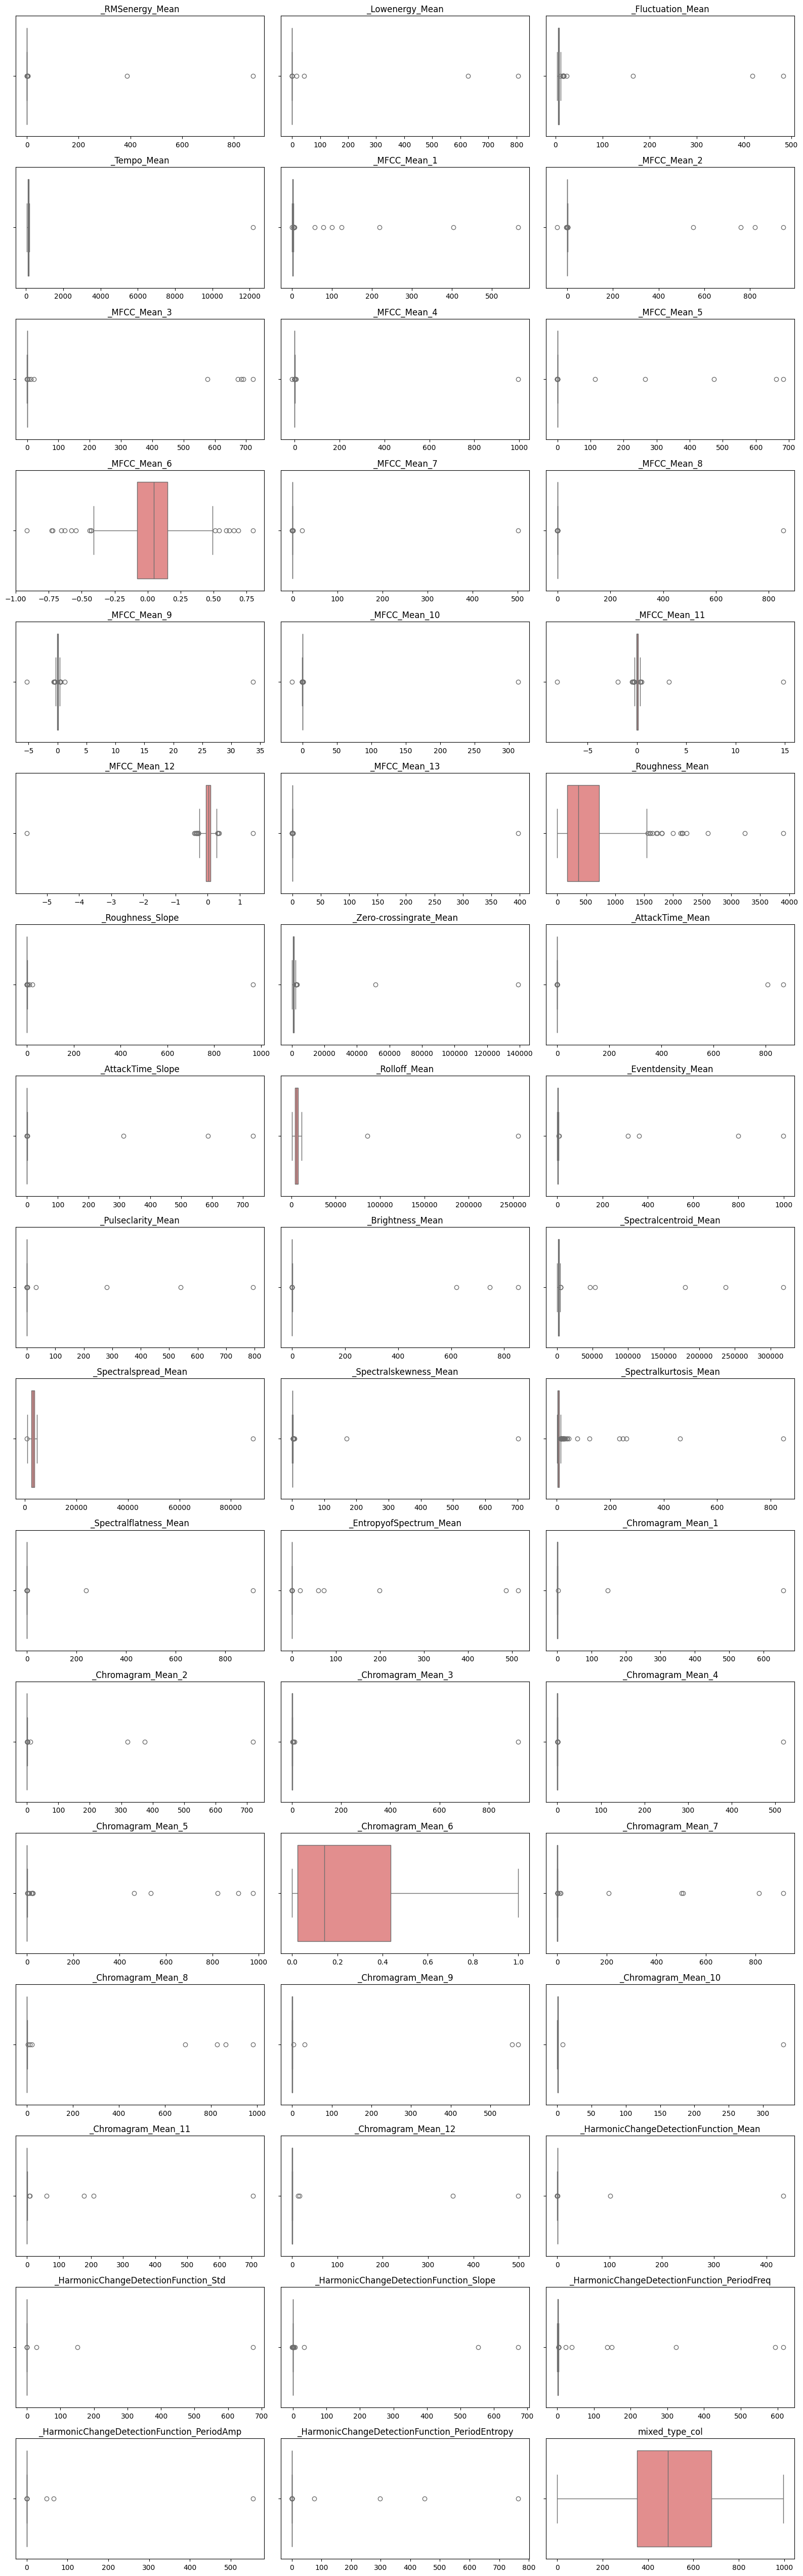

In [ ]:
# Detección de outliers (Boxplots)
num_cols = df.select_dtypes(include=np.number).columns
n_cols = 3  # número de columnas en la cuadrícula
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    
# Ocultar subplots vacíos (si hay más espacios que columnas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Capping de outliers (IQR method)
def cap_outliers(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return s.clip(lower=low, upper=high)

for col in num_cols:
    df[col] = cap_outliers(df[col])

print("Capping de outliers aplicado.")

Capping de outliers aplicado.


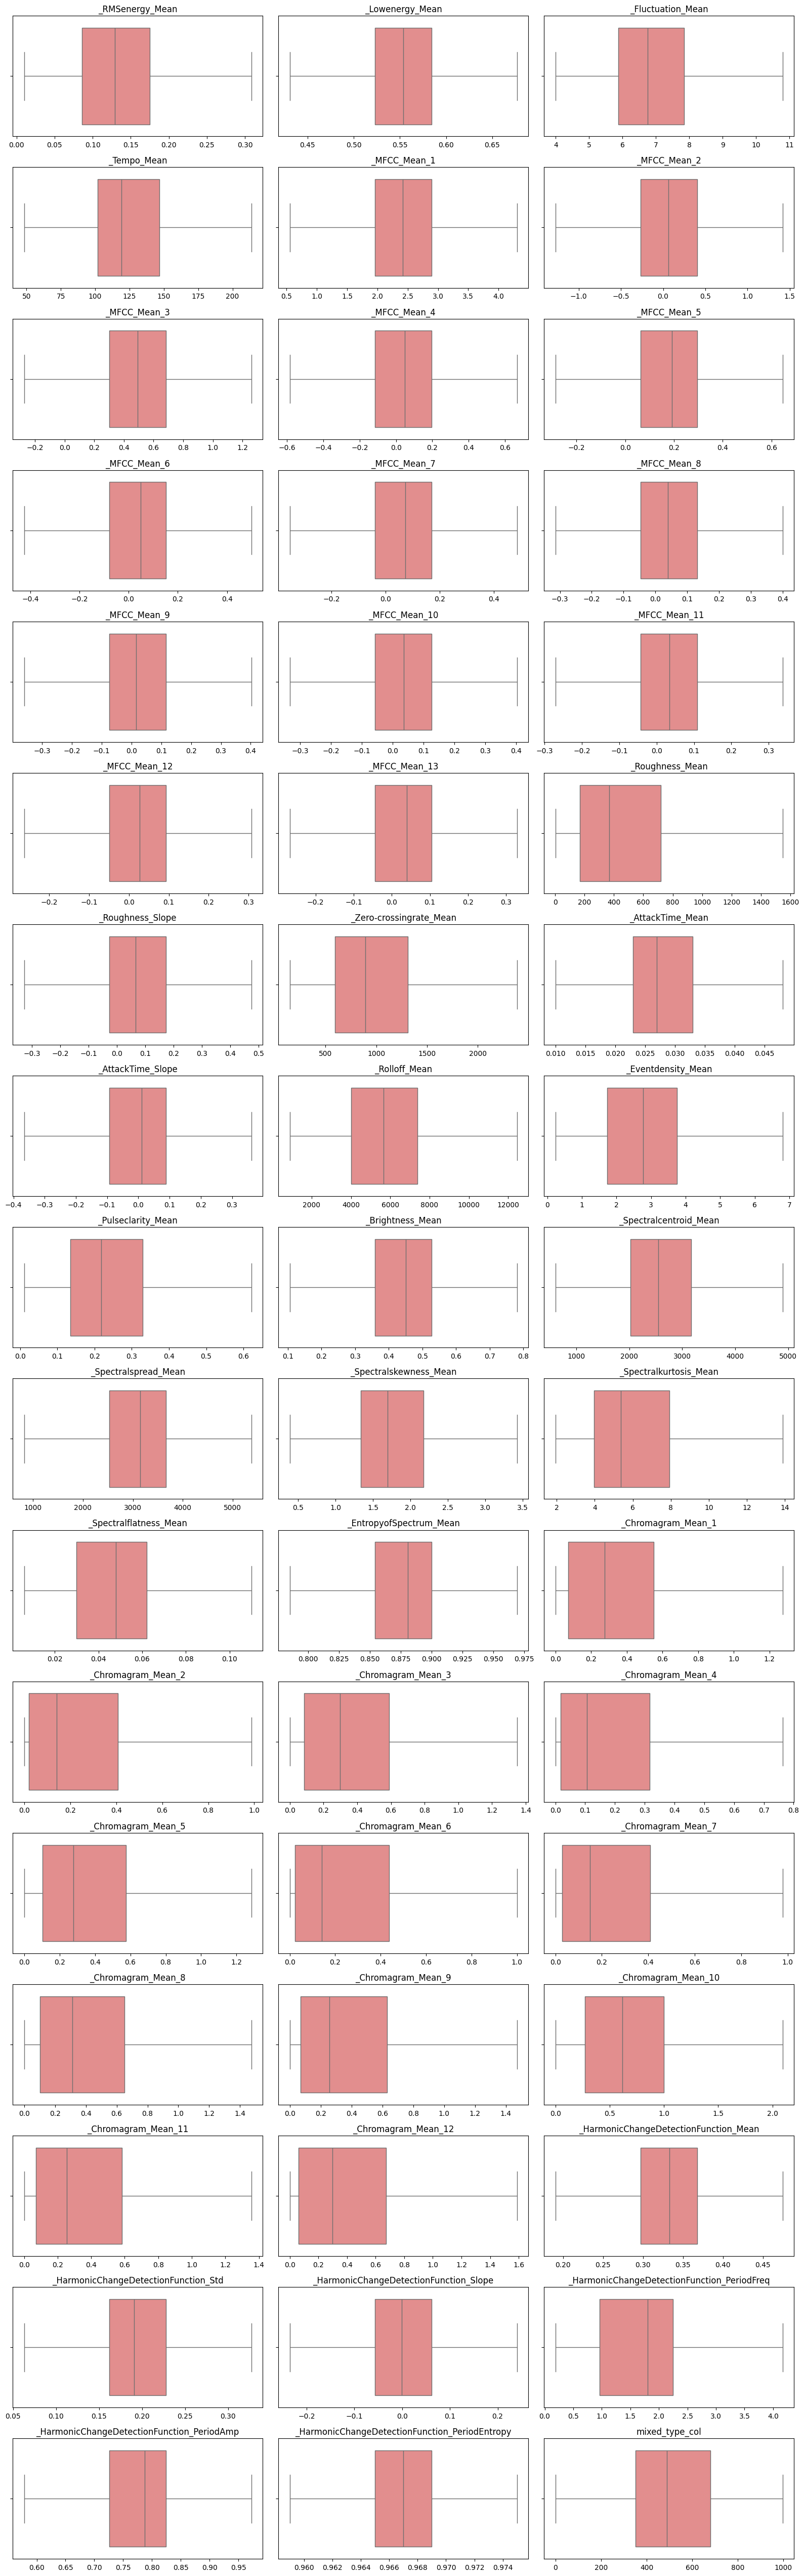

In [90]:
# Detección de outliers (Boxplots)
num_cols = df.select_dtypes(include=np.number).columns
n_cols = 3  # número de columnas en la cuadrícula
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    
# Ocultar subplots vacíos (si hay más espacios que columnas)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/var/folders/wg/3qzb2__s3wqcshs778xdqhpw0000gn/T/ipykernel_56543/865002221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


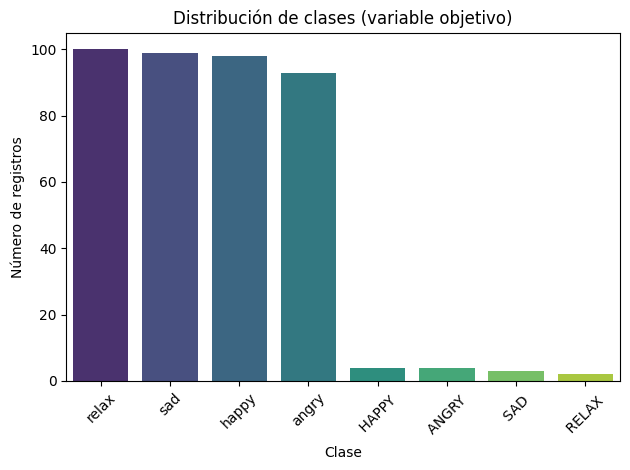

In [87]:
# Distribución de la variable objetivo (Emotion)
if "Class" in df.columns:
    sns.countplot(
        x="Class",
        data=df,
        order=df["Class"].value_counts().index,
        palette="viridis"
    )
    plt.title("Distribución de clases (variable objetivo)")
    plt.xlabel("Clase")
    plt.ylabel("Número de registros")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

In [88]:
# Normalizar la columna 'Class'
df['Class'] = (
    df['Class']
    .astype(str)        # asegurar tipo string
    .str.strip()        # eliminar espacios extra
    .str.lower()        # convertir todo a minúsculas
)

/var/folders/wg/3qzb2__s3wqcshs778xdqhpw0000gn/T/ipykernel_56543/1983506317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


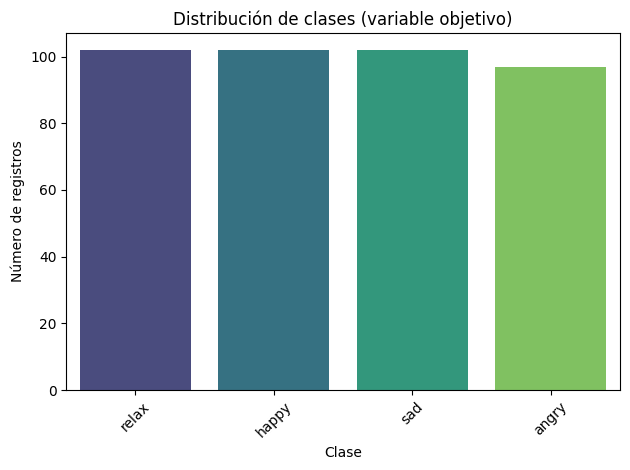

In [89]:
# Distribución de la variable objetivo (Emotion)
if "Class" in df.columns:
    sns.countplot(
        x="Class",
        data=df,
        order=df["Class"].value_counts().index,
        palette="viridis"
    )
    plt.title("Distribución de clases (variable objetivo)")
    plt.xlabel("Clase")
    plt.ylabel("Número de registros")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

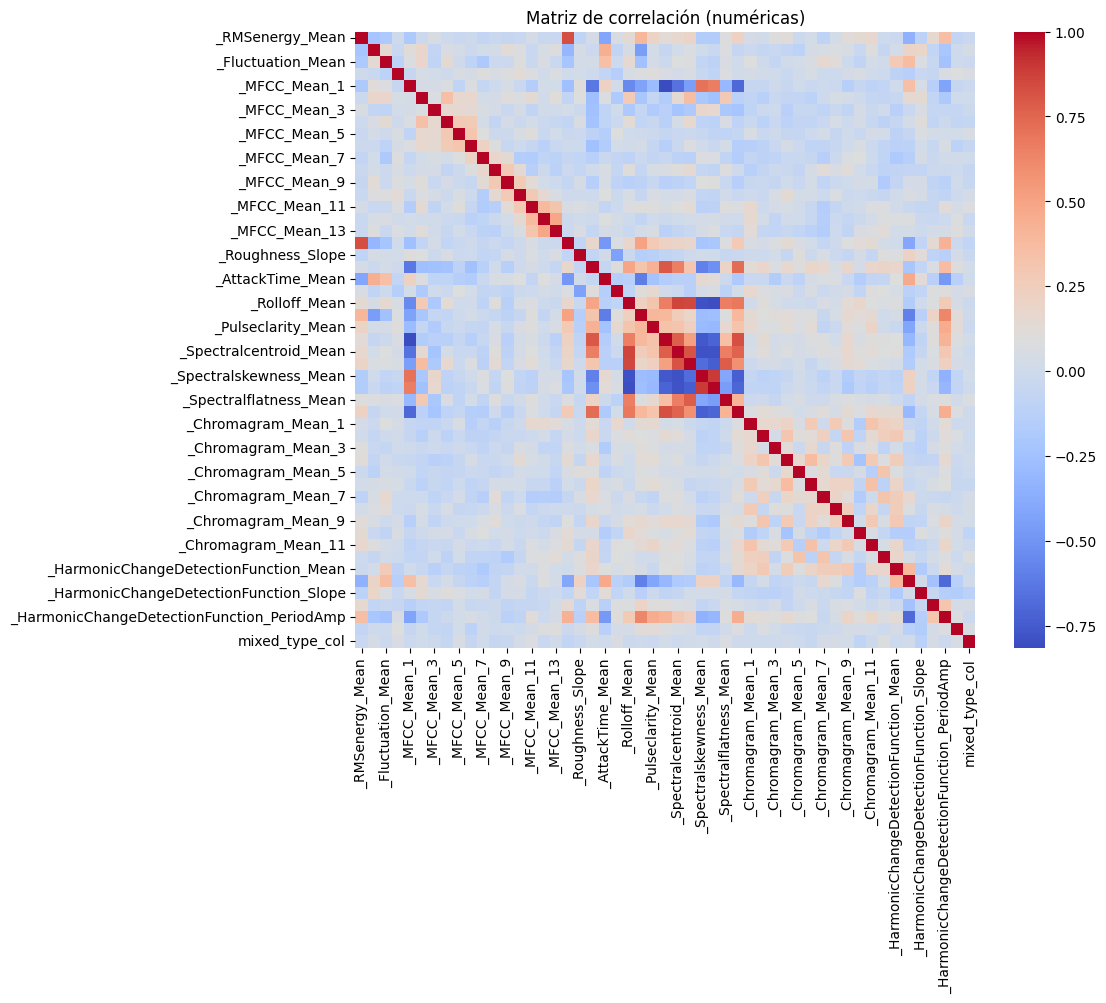

In [91]:
# Correlaciones
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Matriz de correlación (numéricas)")
plt.show()

In [103]:
# Codificación del target
if "Class" in df.columns:
    encoder = LabelEncoder()
    df["class_encoded"] = encoder.fit_transform(df["Class"])
    print("Target codificado en class_encoded.")

Target codificado en class_encoded.


In [ ]:
# Guardar dataset limpio y métricas básicas
os.makedirs("../data/processed", exist_ok=True)
os.makedirs("../reports", exist_ok=True)

output_path = "../data/processed/turkish_music_clean.csv"
df.to_csv(output_path, index=False)
print(f"Dataset limpio guardado en {output_path}")

summary = {
    "rows_original": int(len(df)),
    "columns": len(df.columns),
    "duplicates_removed": int(duplicados),
    "missing_after_cleaning": int(df.isna().sum().sum()),
    "numeric_columns": len(num_cols),
    "categorical_columns": len(cat_cols)
}

pd.DataFrame([summary]).to_json("../reports/eda_metrics.json", orient="records", indent=2)
print("Métricas guardadas en ../reports/eda_metrics.json")

Comparación Data original

In [109]:
DATA_PATH = "../data/turkis_music_emotion_original.csv"
df_original = pd.read_csv(DATA_PATH)

print(f"Dimensiones iniciales: {df.shape}")
df_original.head()

Dimensiones iniciales: (403, 53)


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [110]:
# Cargar dataset original y procesado
print("Dimensiones del original:", df_original.shape)
print("Dimensiones del procesado:", df.shape)

Dimensiones del original: (400, 51)
Dimensiones del procesado: (403, 53)


In [113]:
# Comparar columnas
cols_original = set(df_original.columns)
cols_clean = set(df.columns)

print("Columnas eliminadas:", cols_original - cols_clean)
print("Columnas nuevas:", cols_clean - cols_original)

Columnas eliminadas: set()
Columnas nuevas: {'class_encoded', 'mixed_type_col'}


In [ ]:
# Comparar valores nulos
missing_original = df_original.isna().sum().sum()
missing_clean = df.isna().sum().sum()

print(f"Valores nulos antes: {missing_original}")
print(f"Valores nulos después: {missing_clean}")
print(f"Reducción de nulos: {missing_original - missing_clean}")

Valores nulos antes: 0
Valores nulos después: 0
Reducción de nulos: 0


In [115]:
# Comparar tipos de datos
dtype_diff = pd.DataFrame({
    "Antes": df_original.dtypes,
    "Después": df.dtypes
})
dtype_diff = dtype_diff[dtype_diff["Antes"] != dtype_diff["Después"]]
print("Columnas con cambio de tipo de dato:")
print(dtype_diff)

Columnas con cambio de tipo de dato:
               Antes  Después
class_encoded    NaN    int64
mixed_type_col   NaN  float64


In [119]:
# Comparar estadísticas descriptivas
summary_raw = df_original.describe()
summary_clean = df.describe()

# Combinar promedios para comparar
comparison = pd.DataFrame({
    "Media (raw)": summary_raw.loc["mean"],
    "Media (clean)": summary_clean.loc["mean"],
    "Diferencia": summary_clean.loc["mean"] - summary_raw.loc["mean"]
})
print( comparison)

                                                Media (raw)  Media (clean)  \
_AttackTime_Mean                                   0.031305       0.029045   
_AttackTime_Slope                                 -0.002890      -0.000092   
_Brightness_Mean                                   0.434158       0.437777   
_Chromagram_Mean_1                                 0.352560       0.357999   
_Chromagram_Mean_10                                0.590975       0.601458   
_Chromagram_Mean_11                                0.342340       0.359913   
_Chromagram_Mean_12                                0.385620       0.392161   
_Chromagram_Mean_2                                 0.253035       0.261297   
_Chromagram_Mean_3                                 0.365098       0.378942   
_Chromagram_Mean_4                                 0.208295       0.201795   
_Chromagram_Mean_5                                 0.350412       0.377371   
_Chromagram_Mean_6                                 0.263880     

In [120]:
# Comparar número de outliers
def count_outliers(series):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((series < low) | (series > high)).sum()

outliers_raw = {col: count_outliers(df_original[col]) for col in df_original.select_dtypes(include=np.number).columns}
outliers_clean = {col: count_outliers(df[col]) for col in df.select_dtypes(include=np.number).columns}

diff_outliers = pd.DataFrame({
    "Antes": outliers_raw,
    "Después": outliers_clean
}).fillna(0)

print(diff_outliers.head(10))

                   Antes  Después
_RMSenergy_Mean      2.0        0
_Lowenergy_Mean      9.0        0
_Fluctuation_Mean   14.0        0
_Tempo_Mean          0.0        0
_MFCC_Mean_1        15.0        0
_MFCC_Mean_2         7.0        0
_MFCC_Mean_3         4.0        0
_MFCC_Mean_4        12.0        0
_MFCC_Mean_5         9.0        0
_MFCC_Mean_6        15.0        0


In [123]:
summary = {
    "Filas (antes)": len(df_original),
    "Filas (después)": len(df),
    "Columnas (antes)": df_original.shape[1],
    "Columnas (después)": df.shape[1],
    "Valores nulos (antes)": missing_original,
    "Valores nulos (después)": missing_clean,
    "Columnas eliminadas": list(cols_original- cols_clean),
    "Columnas nuevas": list(cols_clean - cols_original),
}

summary_df = pd.DataFrame([summary])
summary_df.to_markdown(index=False)

print(summary_df)

   Filas (antes)  Filas (después)  Columnas (antes)  Columnas (después)  \
0            400              403                51                  53   

   Valores nulos (antes)  Valores nulos (después) Columnas eliminadas  \
0                      0                        0                  []   

                   Columnas nuevas  
0  [class_encoded, mixed_type_col]  
